# Solar activity forcasting
## Team 10

- [**Introduction**](#intro)
- [**Data Wrangling**](#Da)
- [**Univariate Exploration**](#uni)
- [**Bivaraite Exploration**](#bi)

<a id='intro'></a>
## Introduction
**In this exploratory data analysis, we are trying to study the solar activity and its variation overtime with relying on 7 features that describe the solar activity and another two features that describe the time. These feautes are:**

<center>

|Data columns|Purpose|data types|
| ------------- |:-------------| -----:|
|time|**the periode of the observations from 01-01-1965 to 01-01-2020**|datetime64[ns]|
|year|**The years of the periode**|datetime64[ns]|
|Sunspot number|**Sunspots are phenomena on the Sun's photosphere that appear as temporary spots that are darker than the surrounding areas (A typical spot consists of a dark region called the umbra, surrounded by a lighter region known as the penumbra)**|int64|
|solar wave plasma speed (km/s)|**This plasma atmosphere, consisting of particles and magnetic fields, interacts with the interplanetary environment and produces “space weather,” creating effects on earth both beautiful (auroras) and destructive (power and communication blackouts)**|int64|
|Proton flux (>10 Mev)|**Describes the amount of proton flux coming to the earth that affecting the ionoshpere layer and Satellite solar panel degradation and Satellite processor and memory errors**|float64|
|kp-index|**Describes the disturbance of the Earth’s magnetic field caused by the solar wind. The faster the solar wind blows, the greater the turbulence. The index ranges from 0, for low activity, to 9, which means that an intense geomagnetic storm is under way.**|float64|
|Ap-index|**A measure of the general level of geomagnetic activity over the globe for a given day It is the only global magnetic index forecast by government agencies. It is used by many organizations to plan activities dependent on the state of the Earth's magnetic field**|int64|
|Dst-index (nT)|**Disturbance Storm-Time (Dst) Dst is a measure of the decrease in the horizontal component of the Earth’s magnetic field near the magnetic equator due to increases in the magnetospheric ring current (see the FAQ below). Values less than −50 nanotesla (nT) indicate high geomagnetic activity.**|int64|
|absolute f10.7-index|**The solar flux is used as the basic indicator of solar activity, and to determine the level or radiation being received from the Sun. The solar flux is measured in solar flux units (SFU) and is the amount of radio noise or flux that is emitted at a frequency of 2800 MHz (10.7 cm)**|float64|
</center>

<a id='Da'></a>
## Data Wrangling

### Gathering the Data
> Our first challenge was creating our dataset, first of all we searched for a certified source for solar activity dataset, after certain time we find [omniweb.gdfc.gov](https://omniweb.gsfc.nasa.gov/form/dx1.html) which is a database of solar activity indices owned by NASA, we choosed 7 indices and two absolute and adjusted value of F10.7

In [1]:
# import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read the dataset file
df = pd.read_csv('solar_dataset.csv')
df.head()

,YMD,year,month,day,"W Plasma Speed, km/s",Kp index,R (Sunspot No.),"Dst-index, nT","ap_index, nT",absolute_f10.7_index,adjusted_f10.7_index,Proton flux (>10 Mev)
0,1965 1 1,1965,1,1,347,0.7,33,14,3,82.7,84.1,99999.99
1,1965 1 2,1965,1,2,406,2.3,37,11,11,81.5,82.8,99999.99
2,1965 1 3,1965,1,3,420,1.3,44,4,7,79.4,80.7,99999.99
3,1965 1 4,1965,1,4,344,1.0,44,12,4,78.0,79.3,99999.99
4,1965 1 5,1965,1,5,9999,0.7,37,7,2,77.4,78.6,99999.99


### Assessing the data

In [3]:
df.shape

(20089, 12)

In [4]:
df.tail()

,YMD,year,month,day,"W Plasma Speed, km/s",Kp index,R (Sunspot No.),"Dst-index, nT","ap_index, nT",absolute_f10.7_index,adjusted_f10.7_index,Proton flux (>10 Mev)
20084,2019 12 28,2019,12,28,345,0.3,0,-1,1,69.8,75.4,0.29
20085,2019 12 29,2019,12,29,309,0.0,0,-1,1,69.6,75.2,0.29
20086,2019 12 30,2019,12,30,298,0.3,0,5,2,68.6,75.2,0.29
20087,2019 12 31,2019,12,31,306,0.7,0,2,3,68.2,73.9,0.29
20088,2020 1 1,2020,1,1,318,0.7,6,3,2,69.4,71.4,0.29


In [5]:
# general look on the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20089 entries, 0 to 20088
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YMD                    20089 non-null  object 
 1   year                   20089 non-null  int64  
 2   month                  20089 non-null  int64  
 3   day                    20089 non-null  int64  
 4   W Plasma Speed, km/s   20089 non-null  int64  
 5   Kp index               20089 non-null  float64
 6   R (Sunspot No.)        20089 non-null  int64  
 7   Dst-index, nT          20089 non-null  int64  
 8   ap_index, nT           20089 non-null  int64  
 9   absolute_f10.7_index   20089 non-null  float64
 10  adjusted_f10.7_index   20089 non-null  float64
 11  Proton flux (>10 Mev)  20089 non-null  float64
dtypes: float64(4), int64(7), object(1)
memory usage: 1.8+ MB


In [6]:
# check for missing values
df.isnull().sum()

YMD                      0
year                     0
month                    0
day                      0
W Plasma Speed, km/s     0
Kp index                 0
R (Sunspot No.)          0
Dst-index, nT            0
ap_index, nT             0
absolute_f10.7_index     0
adjusted_f10.7_index     0
Proton flux (>10 Mev)    0
dtype: int64

In [7]:
# check for duplicates
df.duplicated().sum()

0

In [8]:
# checking for outliers
(df['absolute_f10.7_index'] >= 999).sum()

16

#### issues in the data
- wrong data type of YMD
- useless columns "month", "day"
- Bad column names of some columns {'YMD', 'Sunspot number', 'Kp index', 'Ap index', 'SW Plasma Speed, km/s', 'absolute_f10.7_index', 'adjusted_f10.7_index','Proton flux (>10 Mev)'}
- There are 16 outlier values in the absolute f10.7 column

### Cleaning the data

In [9]:
df_copy = df.copy()

In [10]:
# change the type of YMD from int to datetime type
df_copy.YMD = pd.to_datetime(df_copy.YMD)

In [11]:
# Drop the "year" column
df_copy.drop(columns=['month', 'day'], axis=1, inplace=True)

In [12]:
# changing the name of the columns
df_copy.rename(columns={'YMD':'time', 'R (Sunspot No.)':'sunspotN', 'Kp index':'kp',
                   'ap_index, nT':'ap', 'Dst-index, nT':'Dst', 'W Plasma Speed, km/s':'sw_plasma_speed', 
                   'absolute_f10.7_index':'absolute_f10.7', 'adjusted_f10.7_index':'adjusted_f10.7',
                   'Proton flux (>10 Mev)':'proton_flux'}, inplace=True)

In [13]:
# Drop 16 outliers values in "Absolute f10.7" column
df_copy.drop(df_copy[df_copy['absolute_f10.7'] >= 999].index, inplace=True)

In [14]:
df_clean = df_copy.copy()

### Testing the data

In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20073 entries, 0 to 20088
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   time             20073 non-null  datetime64[ns]
 1   year             20073 non-null  int64         
 2   sw_plasma_speed  20073 non-null  int64         
 3   kp               20073 non-null  float64       
 4   sunspotN         20073 non-null  int64         
 5   Dst              20073 non-null  int64         
 6   ap               20073 non-null  int64         
 7   absolute_f10.7   20073 non-null  float64       
 8   adjusted_f10.7   20073 non-null  float64       
 9   proton_flux      20073 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 1.7 MB


In [16]:
(df_clean['absolute_f10.7'] >= 999).sum()

0

## The Structure of our dataset
> This dataset contains 20073 observations of the solar activity throught the period between 01-01-1965 & 01-01-2020 and 10 features (`time`,`year`,`sw_plasma_speed`,`kp`,`sunspotN`,`Dst`,`ap`,`absolute_f10.7`,`adjusted_f10.7`,`proton_flux`):
> - (`time`) is datetime feature
> - (`year`, `sw_plasma_speed`,`sunspotN`,`Dst`,`ap`) are int features
> - (`kp`,`absolute_f10.7`,`adjusted_f10.7`,`proton_flux`) are float features

## Eploration

<a id='uni'></a>
### Univariate Eploration

In [17]:
df_clean.describe()

,year,sw_plasma_speed,kp,sunspotN,Dst,ap,absolute_f10.7,adjusted_f10.7,proton_flux
count,20073.000000,20073.000000,20073.000000,20073.000000,20073.000000,20073.000000,20073.000000,20073.000000,20073.000000
mean,1991.999004,1574.763912,2.129617,86.819559,-14.812634,12.696657,119.358098,119.421322,8485.810987
std,15.873679,3097.079809,1.176267,76.492996,19.963895,14.104041,48.543514,48.446168,27855.887269
min,1965.000000,193.000000,0.000000,0.000000,-240.000000,0.000000,63.400000,64.600000,0.110000
25%,1978.000000,370.000000,1.300000,22.000000,-23.000000,5.000000,77.000000,77.100000,0.230000
50%,1992.000000,432.000000,2.000000,68.000000,-11.000000,8.000000,105.400000,105.400000,0.340000
75%,2006.000000,547.000000,3.000000,136.000000,-2.000000,15.000000,149.100000,149.200000,0.700000
max,2020.000000,9999.000000,8.000000,428.000000,34.000000,246.000000,367.000000,367.000000,99999.990000


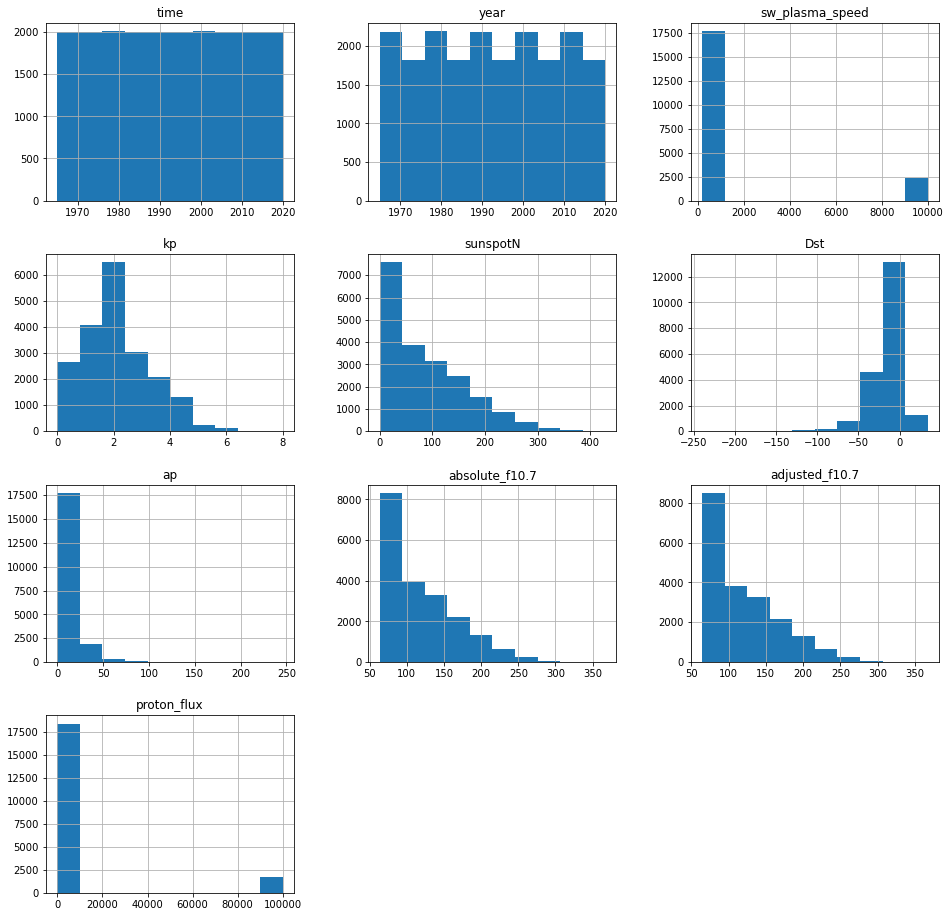

In [18]:
df_clean.hist(figsize=(16, 16));

### Sunspots
Sunspot number is right skewed with long taile. most of days have small sunspots in range of [0:50] sunspots and     only a few of days have sunspots more than 300 sunspots.If sunspots are active, more solar flares will result creating  an increase in geomagnetic storm activity for Earth

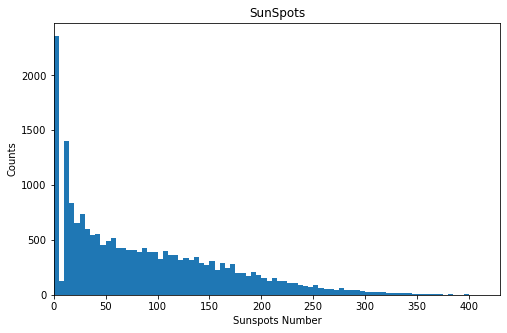

In [19]:
# sunspot number plot
plt.figure(figsize=(8,5))
bins = np.arange(0, 430, 5)
plt.hist(df_clean.sunspotN, bins=bins)
plt.xlim(0,430)
plt.title('SunSpots')
plt.xlabel('Sunspots Number')
plt.ylabel('Counts');

### Kp-index
        Kp-index is ranged from 0 for quiet weather to 9 for Intense storm. in this data tha maximum Kp is 8 for Severe      storm. we notice that our graph is approximatly unimoda, the values centerlized between 1 and 2(quiet range), only a few observations have values bigger than 4 (beginning of the active range).

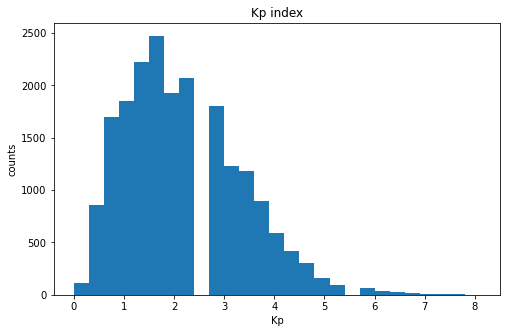

In [20]:
# KP plot
plt.figure(figsize=(8, 5))
bins = np.arange(0, 8+0.3, 0.3)
plt.hist(df_clean.kp, bins=bins)
plt.title('Kp index')
plt.xlabel('Kp')
plt.ylabel("counts");

## Ap-index
        Here we see most of the values are in range of [0:20] and the storm occurs when the Ap > 29, a minor storm when 29 < Ap < 50, a major storm when 50 <= Ap < 100 and a severe storm when Ap >= 100.

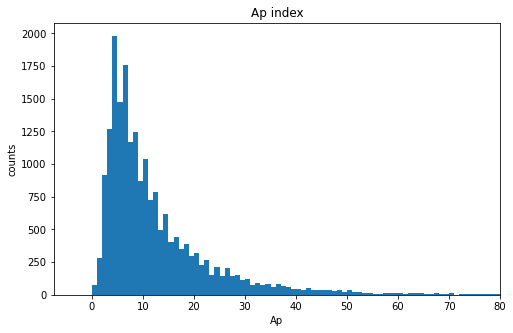

In [21]:
# AP plot
plt.figure(figsize=(8, 5))
bins = np.arange(0, 150+1, 1)
plt.hist(df_clean.ap, bins=bins)
plt.xlim(right=80)
plt.title('Ap index')
plt.xlabel('Ap')
plt.ylabel("counts");

### Disturbance Storm-Time (Dst) Index
        As we see most the observation is between [0:-50] (quiet to mild storm) and only a few observations less than -50   ranging from moderate storms for values less than -100 and intense storms for values less than -250

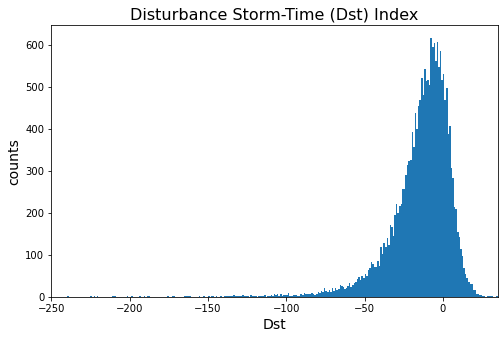

In [24]:
# Dst plot
plt.figure(figsize=(8, 5))
bins = np.arange(-240, 35+1, 1)
plt.hist(df_clean.Dst,bins=bins)
plt.xlim(-250,35)
plt.title('Disturbance Storm-Time (Dst) Index', fontdict={'fontsize': 16})
plt.xlabel('Dst', fontdict={'fontsize': 14})
plt.ylabel("counts", fontdict={'fontsize': 14});

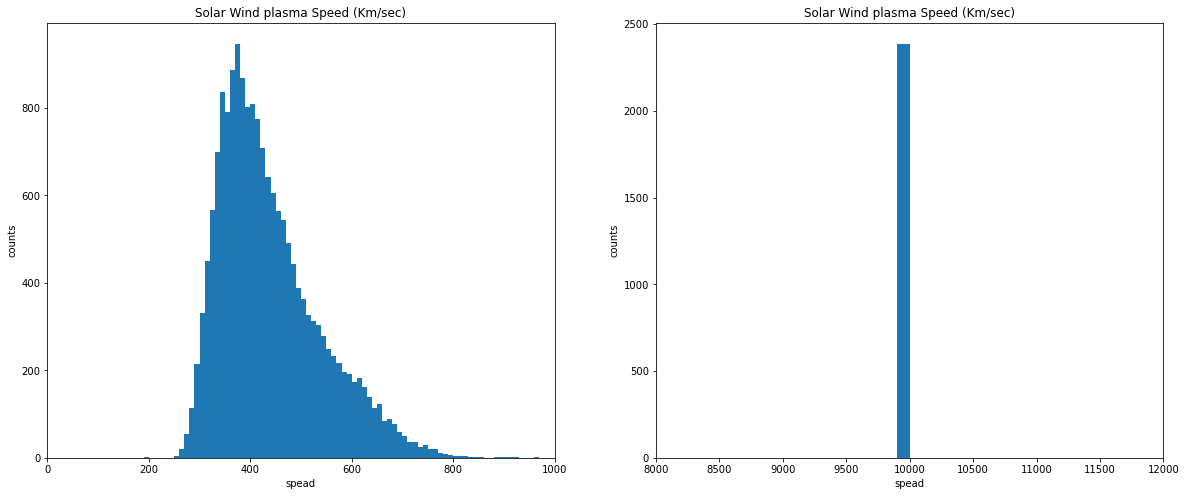

In [25]:
# Solar Wind plasma Speed (Km/sec) plot
plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
bins = np.arange(0, 1000+10, 10)
plt.hist(df_clean.sw_plasma_speed, bins=bins)
plt.xlim(0,1000)
plt.title('Solar Wind plasma Speed (Km/sec)')
plt.xlabel('spead')
plt.ylabel("counts");

plt.subplot(1,2,2)
bins = np.arange(9000, 10000+100, 100)
plt.hist(df_clean.sw_plasma_speed, bins=bins)
plt.xlim(8000,12000)
plt.title('Solar Wind plasma Speed (Km/sec)')
plt.xlabel('spead')
plt.ylabel("counts");

### Solar Wind plasma Speed (Km/sec)
Here we have two centeralization of the data, firt one is in range from 300 to 800 km/s and most of the values around 400 km/s. second one is at 9999.9 km/s for more than 2400 observations

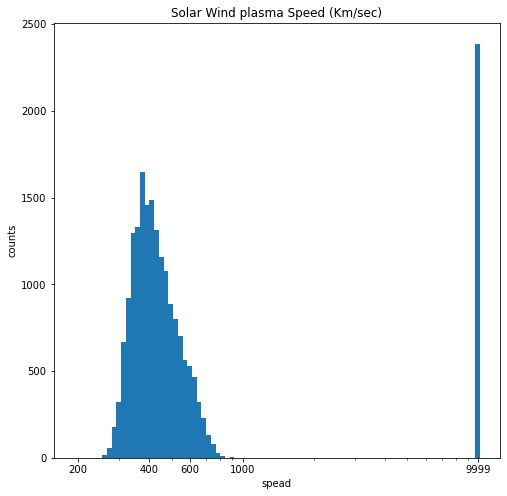

In [26]:
# let's take a deeper look to see the centralization of data
binsize = 0.02
bins = 10 ** np.arange(np.log10(193), np.log10(9999)+binsize, binsize)
plt.figure(figsize=(8,8))
plt.hist(df_clean.sw_plasma_speed, bins=bins)
plt.xscale('log')
plt.title('Solar Wind plasma Speed (Km/sec)')
plt.xticks([200, 400, 600, 1000, 10000], [200, 400, 600, 1000, 9999])
plt.xlabel('spead')
plt.ylabel("counts");

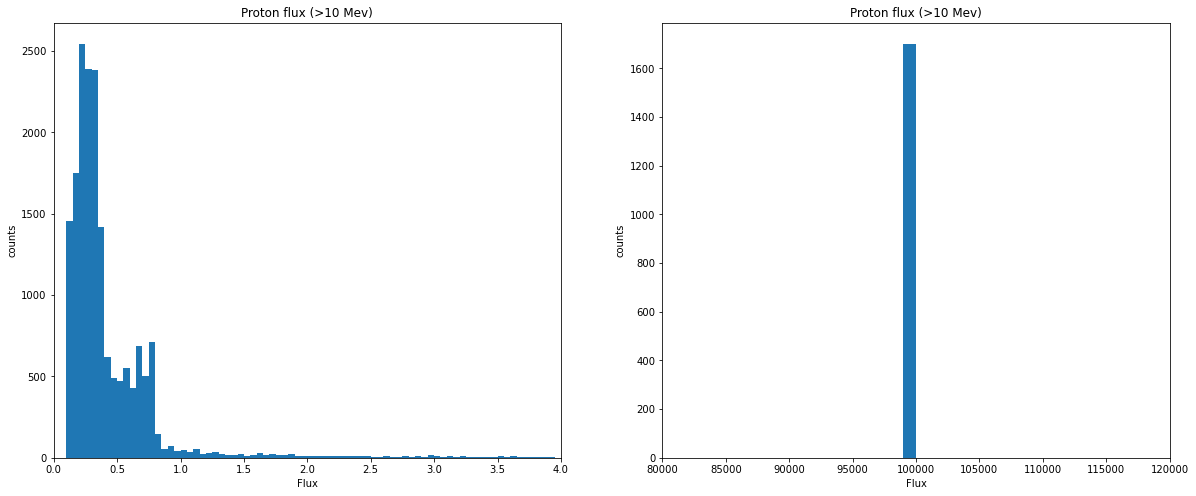

In [27]:
# Proton flux (>10 Mev) plot
plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
bins = np.arange(0, 4, 0.05)
plt.hist(df_clean.proton_flux, bins=bins)
plt.xlim(0,4)
plt.title('Proton flux (>10 Mev)')
plt.xlabel('Flux')
plt.ylabel("counts");

plt.subplot(1,2,2)
bins = np.arange(90000, 100000+1000, 1000)
plt.hist(df_clean.proton_flux, bins=bins)
plt.xlim(80000,120000)
plt.title('Proton flux (>10 Mev)')
plt.xlabel('Flux')
plt.ylabel("counts");

### Proton Flux (> 10 Mev)
as we see, most of the values are in range from 0.1 to 100 ev and there are around 1700 obervations with 99999 ev 

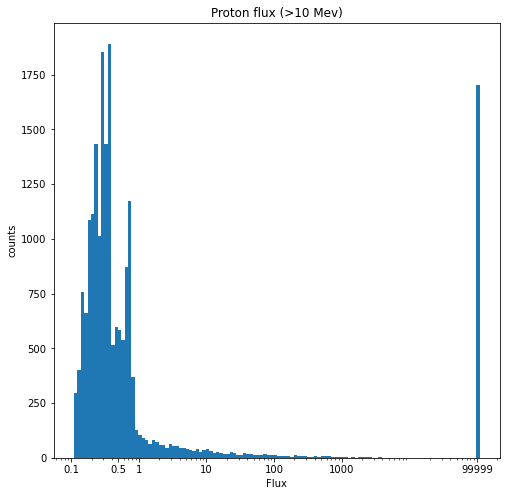

In [28]:
# let's take a deeper look to see the centralization of data
binsize = 0.05
bins = 10 ** np.arange(np.log10(0.110000), np.log10(99999.990000)+binsize, binsize)
plt.figure(figsize=(8,8))
plt.hist(df_clean.proton_flux, bins=bins)
plt.xscale('log')
plt.title('Proton flux (>10 Mev)')
plt.xticks([0.1, 0.5, 1, 10, 100, 1000, 10**5], [0.1, 0.5, 1, 10, 100, 1000, 99999])
plt.xlabel('Flux')
plt.ylabel("counts");

### Absolute Solar Flux F10.7 index
after taking the log-scale of absolute f10.7 data, its pretty clear that the histogram is right skewed and most of the observations have low solar flux under 100 SFU and a few observations are higher than 300 SFU.

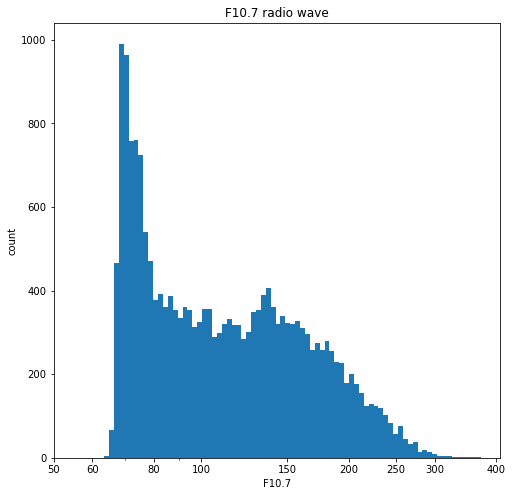

In [29]:
# let's take a deeper look to see the centralization of data
plt.figure(figsize=(8,8))
binsize = 0.01
bins = 10**np.arange(np.log10(63.4), np.log10(367)+binsize, binsize)
plt.hist(df_clean['absolute_f10.7'], bins=bins)
plt.xscale('log')
plt.xticks([50, 60, 80, 100, 150, 200, 250, 300, 400], [50, 60, 80, 100, 150, 200, 250, 300, 400])
plt.title('F10.7 radio wave')
plt.xlabel('F10.7')
plt.ylabel('count');

As we see that there is no difference between the absolute f10.7 and adjusted f10.7

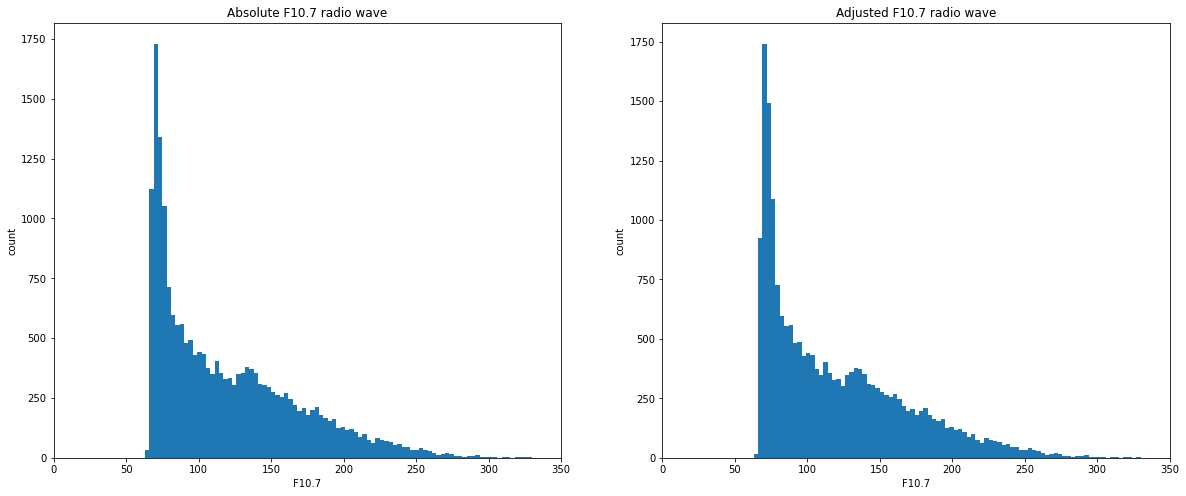

In [30]:
# F10.7 plot
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
bins = np.arange(0, 400+3, 3)
plt.hist(df_clean['absolute_f10.7'], bins=bins)
plt.xlim(0, 350)
plt.title('Absolute F10.7 radio wave')
plt.xlabel('F10.7')
plt.ylabel('count');

plt.subplot(1, 2, 2)
bins = np.arange(0, 400+3, 3)
plt.hist(df_clean['adjusted_f10.7'], bins=bins)
plt.xlim(0, 350)
plt.title('Adjusted F10.7 radio wave')
plt.xlabel('F10.7')
plt.ylabel('count');

<a id='bi'></a>
### Bivariat Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

in this plot as we see :
- There is a strong negative correlation between Disturbance-storm Time(Dst) and Kp and Ap indices and a moderate negative correlation with F10.7 index
- F10.7-index has a strong positive correlation with the Sunspot Number and weak positive correlation with Kp and Ap indices
- The Sunspot numbers has a weak positive correlation with Kp and Ap indices
- There is a strong correlation between Kp and Ap indices

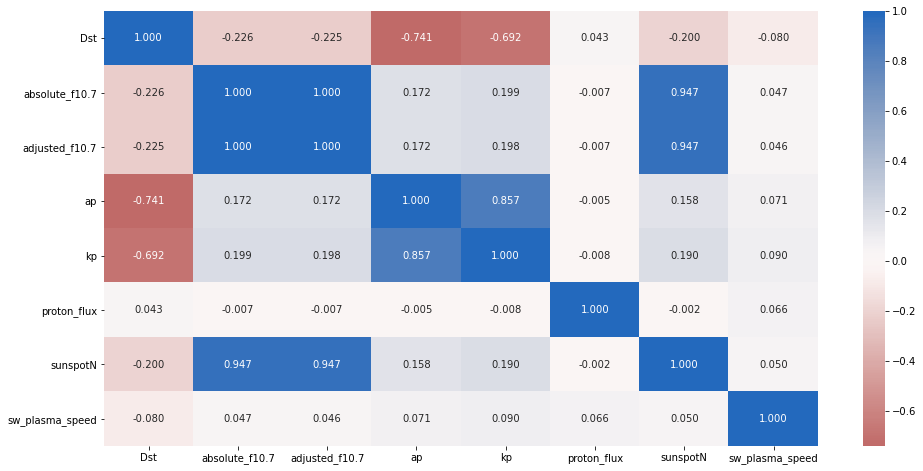

In [31]:
# correlation plot using Heat map
numeric_col = df_clean.columns.difference(['time', 'year'])
plt.figure(figsize=(16, 8))
sns.heatmap(df_clean[numeric_col].corr(), annot=True, fmt='.3f', center=0, cmap='vlag_r');

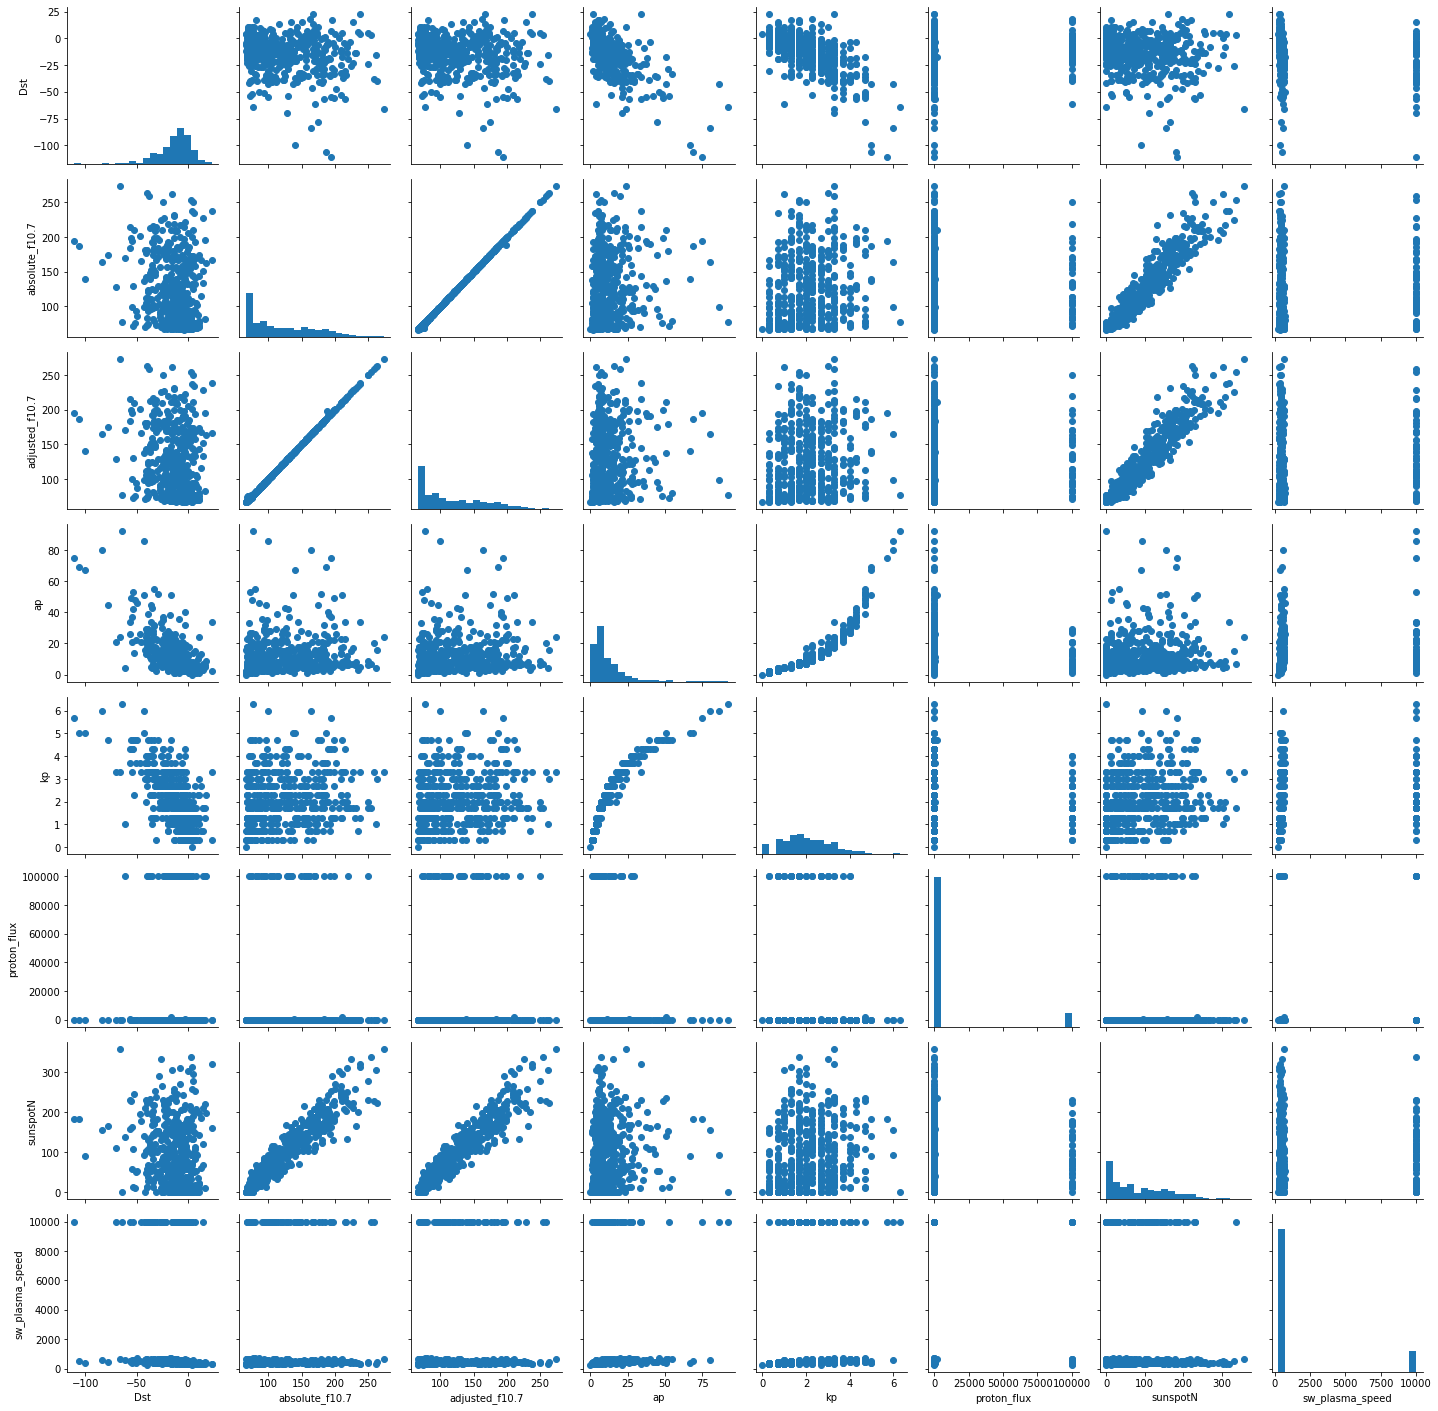

In [32]:
# plot matrix: sample of 500 observations to the plot clearer and render faster
sample = np.random.choice(df_clean.shape[0], 500, replace=False)
df_sample = df_clean.iloc[sample,2:]
g = sns.PairGrid(df_sample, vars=numeric_col)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter);

As we see here that:
- only the sunspot number has a direct strong effect on the solar flux (F10.7 index)
- and only the solar flux has a weak effect on the three geomagnetic indices

### SunspotN vs. absolute f10.7
In this scatter plot we can see the strong correlation between the Sunspot Number and the absolute f10.7 (solar flux). The more the sunspots the more the solar flux.

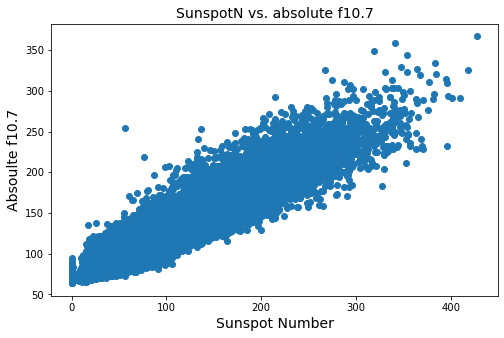

In [33]:
# scatter plot between sunspot number and absolute f10.7
plt.figure(figsize=(8, 5))
plt.scatter(data=df_clean, x='sunspotN', y='absolute_f10.7')
plt.title('SunspotN vs. absolute f10.7', fontdict={'fontsize': 14})
plt.xlabel('Sunspot Number', fontdict={'fontsize': 14})
plt.ylabel('Absoulte f10.7', fontdict={'fontsize': 14});

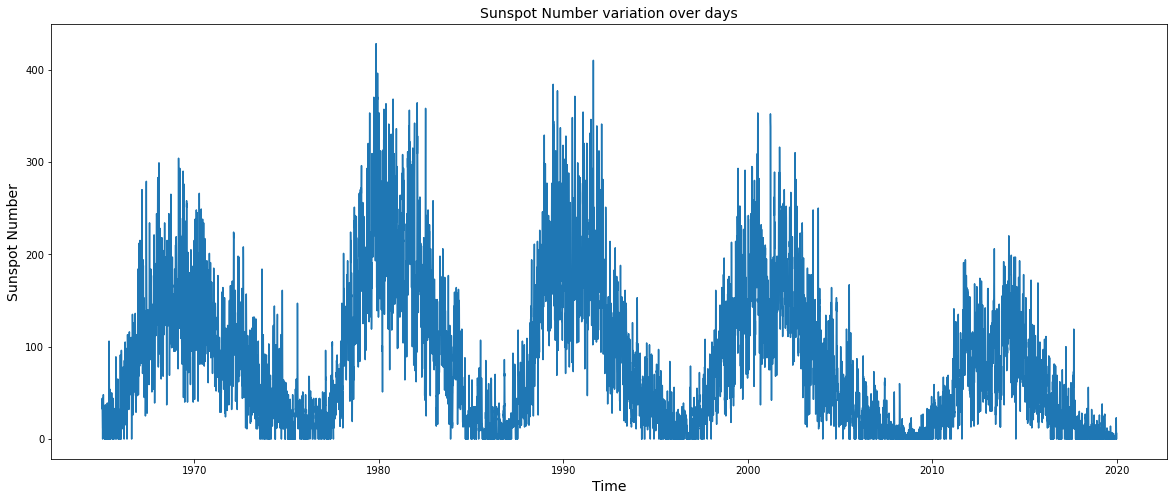

In [34]:
# Sunspot number vs. time
plt.figure(figsize=(20, 8))
sns.lineplot(x='time',y='sunspotN', data=df_clean)
plt.title('Sunspot Number variation over days', fontdict={'fontsize': 14})
plt.ylabel('Sunspot Number', fontdict={'fontsize': 14})
plt.xlabel('Time', fontdict={'fontsize': 14});

In [35]:
# group the data by years and take the average of each year
data = df_clean.groupby(['year']).mean()

In [36]:
# extracting the years of max & min values 
max_sunspotN_list = []
max_year_list = []
min_year_list = []
i = 0
while i < 55:
    query = data.iloc[i:i+10,:]
    max_sunspotN_list.append(query.max()['sunspotN'])
    max_year_list.append(query[query['sunspotN'] == query.max()['sunspotN']].index[0])
    min_year_list.append(query[query['sunspotN'] == query.min()['sunspotN']].index[0])
    i+=10

In [37]:
print(max_sunspotN_list)
print(max_year_list)
print(min_year_list)

[150.0136612021858, 220.06027397260274, 211.05205479452056, 173.85792349726776, 113.34520547945205, 69.61813186813187]
[1968, 1979, 1989, 2000, 2014, 2015]
[1965, 1976, 1986, 1996, 2008, 2019]


### Sunspot Number variation over years
ploting the variation of sunspot over years makes it clear that 
- The variation is approximatly periodic over about 11 years 
- The variation during each cycle is different

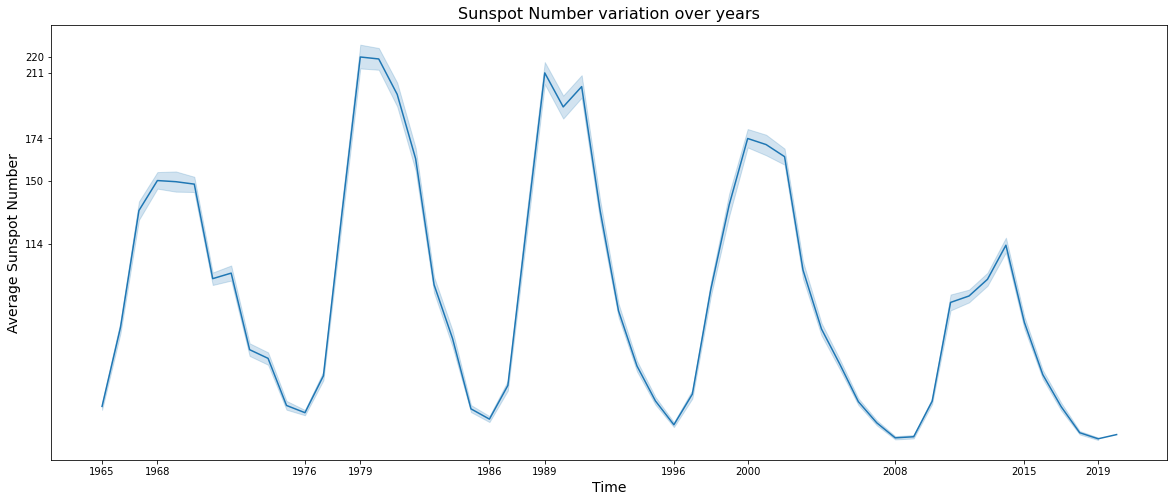

In [38]:
# ploting average sunspots variation over years 
plt.figure(figsize=(20, 8))
sns.lineplot(x='year',y='sunspotN', data=df_clean)
xticks = [1965, 1968, 1976, 1979, 1986, 1989, 1996, 2000, 2008, 2015, 2019]
yticks = [150, 220, 211, 174, 114]
plt.yticks(yticks, yticks)
plt.xticks(xticks, xticks)
plt.title('Sunspot Number variation over years', fontdict={'fontsize': 16})
plt.ylabel('Average Sunspot Number', fontdict={'fontsize': 14})
plt.xlabel('Time', fontdict={'fontsize': 14});

In [39]:
# extracting the years of max & min values 
max_f107_list = []
max_year_list = []
min_year_list = []
i = 0
while i < 55:
    query = data.iloc[i:i+10,:]
    max_f107_list.append(query.max()['absolute_f10.7'])
    max_year_list.append(query[query['absolute_f10.7'] == query.max()['absolute_f10.7']].index[0])
    min_year_list.append(query[query['absolute_f10.7'] == query.min()['absolute_f10.7']].index[0])
    i+=10

In [40]:
print(max_f107_list)
print(max_year_list)
print(min_year_list)

[155.99863013698632, 202.6035616438355, 213.4235616438355, 181.09808219178083, 145.9356164383562, 117.71978021978016]
[1970, 1981, 1989, 2001, 2014, 2015]
[1965, 1976, 1986, 1996, 2008, 2020]


### Solar Flux variation over years
ploting the variation of solar flux over years makes it clear that 
- The variation is approximatly periodic over about 11 years 
- The variation during each cycle is different

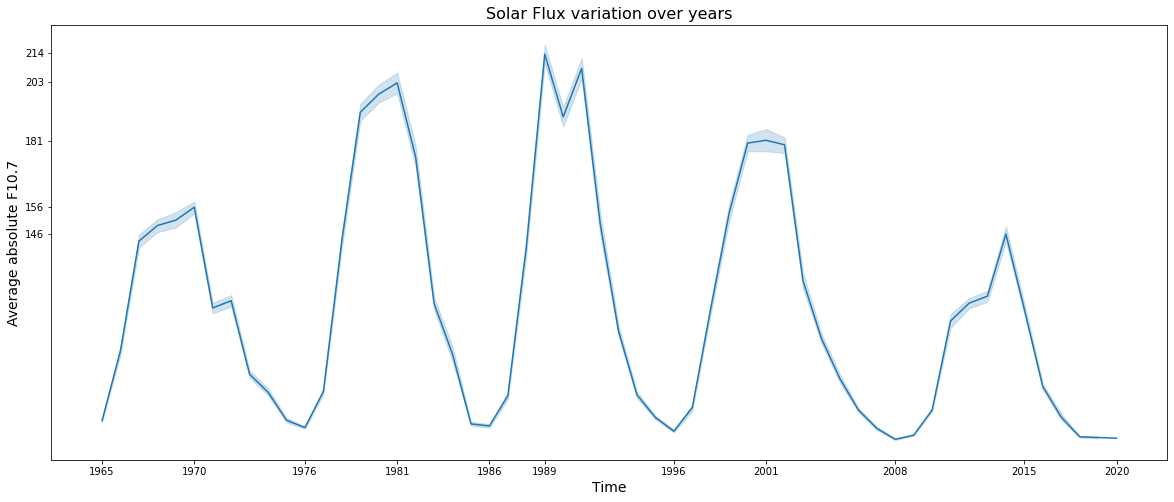

In [41]:
# ploting average sunspots variation over years
plt.figure(figsize=(20, 8))
sns.lineplot(x='year',y='absolute_f10.7', data=df_clean, )
xticks = [1965, 1970, 1976, 1981, 1986, 1989, 1996, 2001, 2008, 2015, 2020]
yticks = [156, 203, 214, 181, 146]
plt.xticks(xticks,xticks);
plt.yticks(yticks, yticks)
plt.title('Solar Flux variation over years', fontdict={'fontsize': 16})
plt.ylabel('Average absolute F10.7', fontdict={'fontsize': 14})
plt.xlabel('Time', fontdict={'fontsize': 14});

### Sunspots and F10.7 Variation over years
The sunspots have a direct effect on the solar flux, they are increasing together and decreasing together over the same cycle.

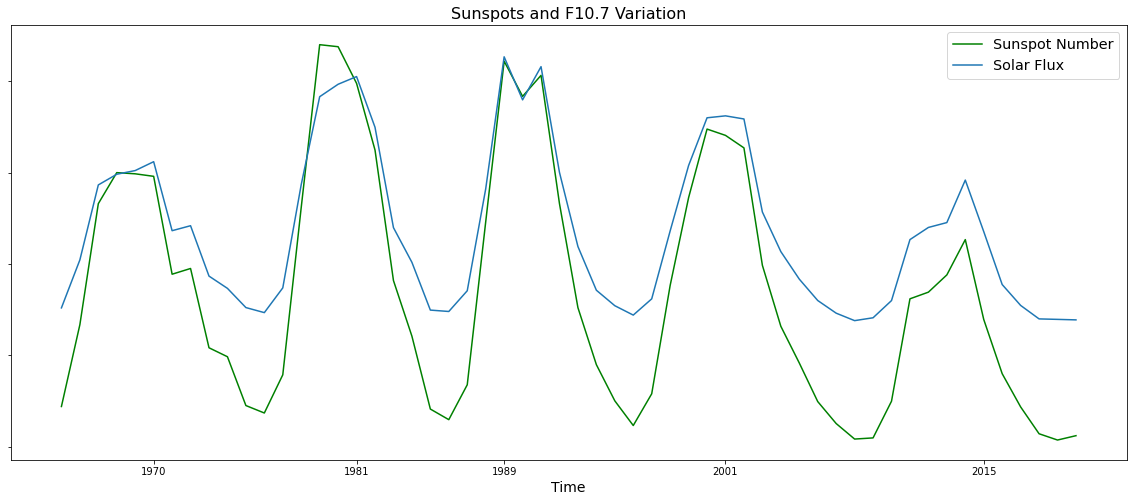

In [42]:
# ploting the two line on the same figure
fig, ax = plt.subplots(figsize=(20, 8))
line1, = ax.plot('sunspotN', data=data, color='g')
line2, = ax.plot('absolute_f10.7', data=data)
ax.set_yticklabels([])
plt.legend((line1, line2), ('Sunspot Number', 'Solar Flux'),fontsize='x-large')
plt.title('Sunspots and F10.7 Variation', fontsize=16)
xticks = [1970, 1981, 1989, 2001, 2015]
plt.xticks(xticks, xticks)
plt.xlabel('Time', fontsize=14)
plt.show();

### The effect of solar flux on Kp-index
As we see, Kp-indix with high values indicates to high solar flux and vice versa, for example, strong and severe storms at Kp of 7 and 8 indicates high solar flux above 200 SFU in average and quiet storms at Kp of 1 and 2 indicates low solar flux under 125 SFU in average.

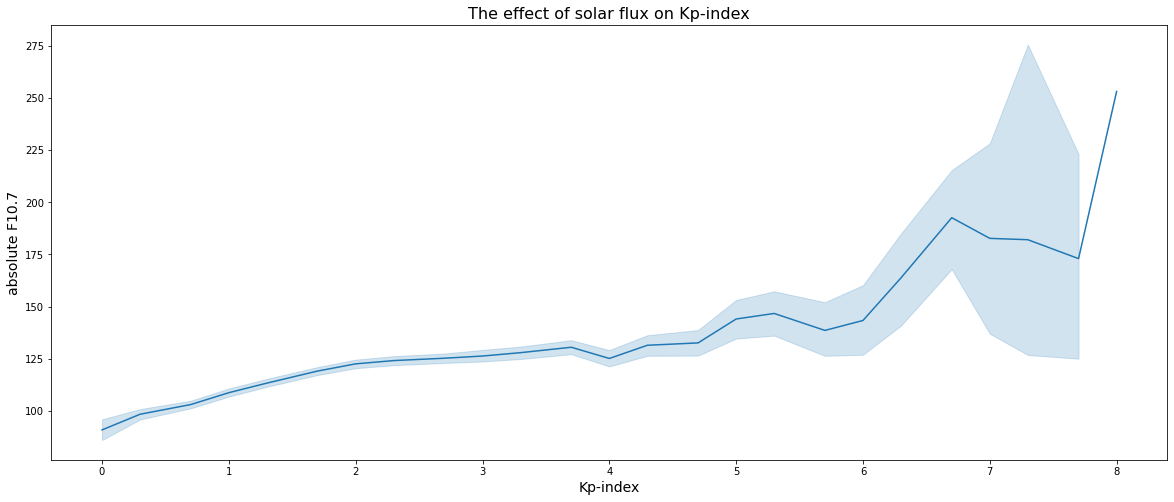

In [43]:
# Kp-index vs F10.7
plt.figure(figsize=(20, 8))
sns.lineplot(x='kp', y='absolute_f10.7', data=df_clean)
plt.title('The effect of solar flux on Kp-index', fontdict={'fontsize': 16})
plt.ylabel('absolute F10.7', fontdict={'fontsize': 14})
plt.xlabel('Kp-index', fontdict={'fontsize': 14});

### The effect of solar flux on Ap-index
Ap-index is driven of Kp-index, and as we see that the variation of solar flux is weak when the Ap is under 30 and after that the variation is becoming significantly and that is because when the Ap-index is less than 25 the storm is quiet and after that it becomes active and it becomes severe storm when Ap-index pass 100. 

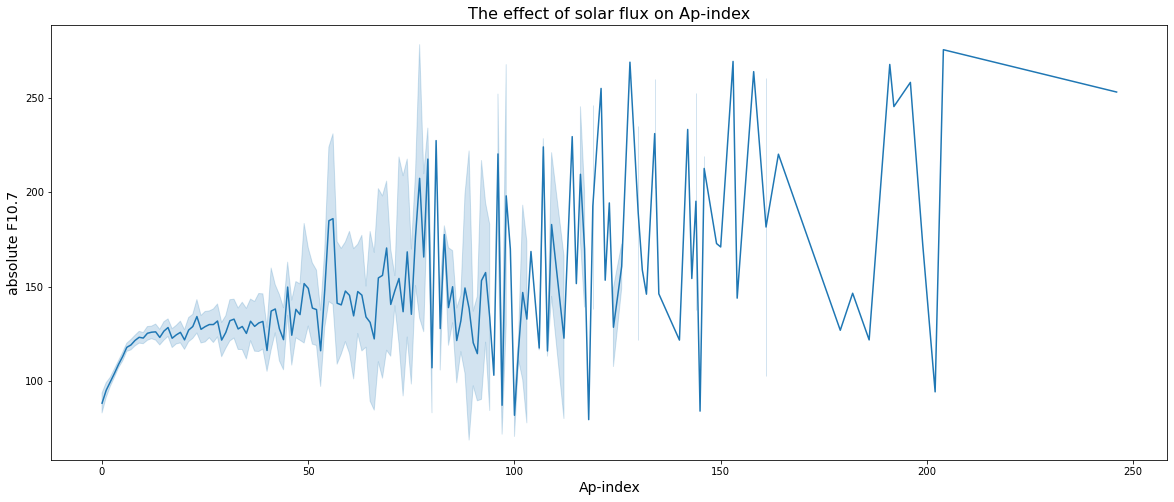

In [44]:
# Ap-index vs F10.7
plt.figure(figsize=(20, 8))
sns.lineplot(x='ap', y='absolute_f10.7', data=df_clean)
plt.title('The effect of solar flux on Ap-index', fontdict={'fontsize': 16})
plt.ylabel('absolute F10.7', fontdict={'fontsize': 14})
plt.xlabel('Ap-index', fontdict={'fontsize': 14});

### The effect of solar flux on Dst-index
As we see the Dst variating significantly as the absolute F10.7 increasing and that means the more solar flux is the weak the earth magnetic feild,
- 0 > Dst < -50 quite to mild storm
- -50 > Dst < -100 moderate storm
- -100 > Dst < -250 intense storm
- Dst < -250 strong storm

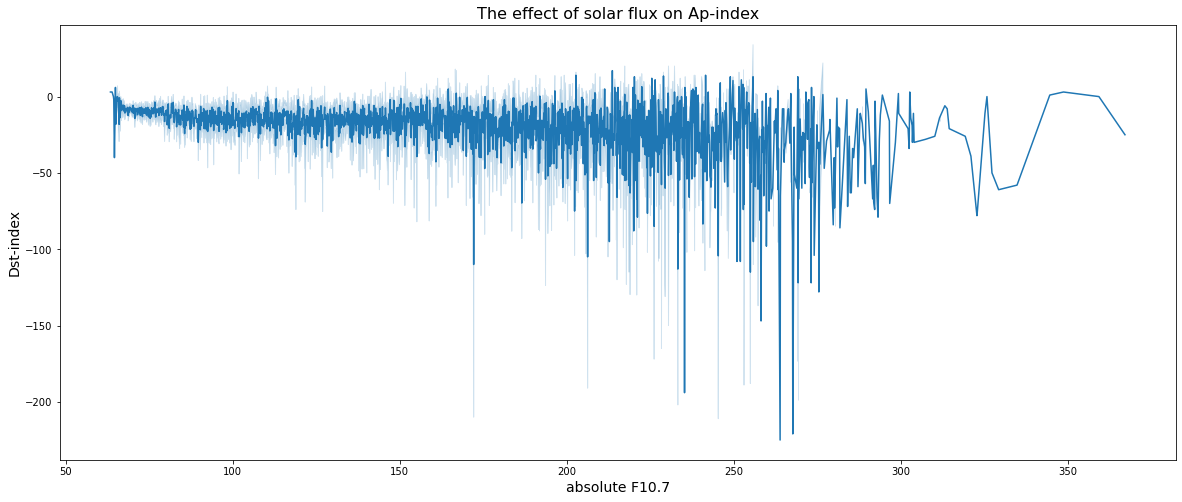

In [45]:
# DST-index vs F10.7
plt.figure(figsize=(20, 8))
sns.lineplot(y='Dst', x='absolute_f10.7', data=df_clean)
plt.title('The effect of solar flux on Ap-index', fontdict={'fontsize': 16})
plt.xlabel('absolute F10.7', fontdict={'fontsize': 14})
plt.ylabel('Dst-index', fontdict={'fontsize': 14});

In [46]:
# extracting the years of max or min values 
max_kp_list = []
max_year_list = []
i = 0
while i < 55:
    query = data.iloc[i:i+10,:]
    max_f107_list.append(query.max()['kp'])
    max_year_list.append(query[query['kp'] == query.max()['kp']].index[0])
    min_year_list.append(query[query['kp'] == query.min()['kp']].index[0])
    i+=10

In [47]:
print(max_year_list)

[1974, 1982, 1991, 2003, 2005, 2015]


### The variation of geomagnetic indices overime
As we see, the indices are changing overtime
- Kp and Ap indices have some peaks that indicates high solar activity 
- Dst have very low values that indicates how much the solar activity weakend the geomagnetic field.
- the higher the Kp and Ap indeices the lower the Dst

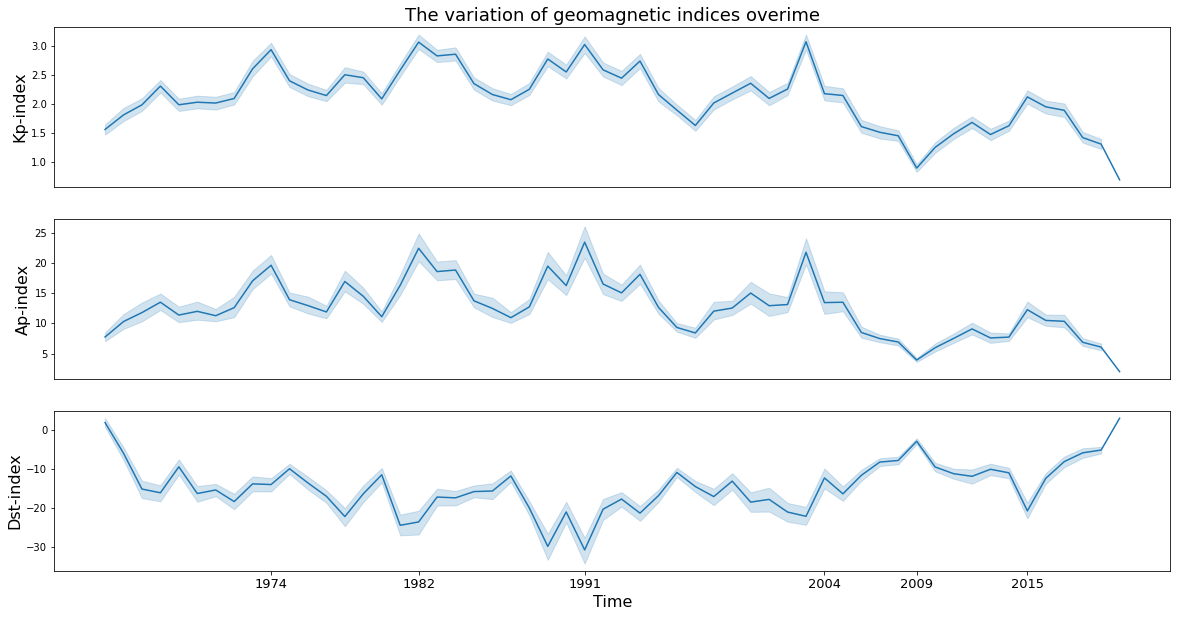

In [58]:
# the variation of the geomagnetic indices overtime
# Kp-index plot
plt.figure(figsize=(20, 10))
plt.subplot(3,1,1)
sns.lineplot(x='year',y='kp', data=df_clean)
plt.title("The variation of geomagnetic indices overime", fontsize=18)
plt.ylabel('Kp-index', fontsize=16)
plt.xlabel(' ')
plt.xticks([]);

# Ap-index plot
plt.subplot(3,1,2)
sns.lineplot(x='year',y='ap', data=df_clean);
plt.ylabel('Ap-index', fontsize=16)
plt.xlabel(' ')
plt.xticks([]);

# Dst-index plot
plt.subplot(3,1,3)
sns.lineplot(x='year',y='Dst', data=df_clean);
plt.xlabel('Time', fontsize=16)
xticks = [1974, 1982, 1991, 2004, 2009, 2015]
plt.xticks(xticks, xticks, fontsize=13)
plt.ylabel('Dst-index', fontsize=16);
plt.show();

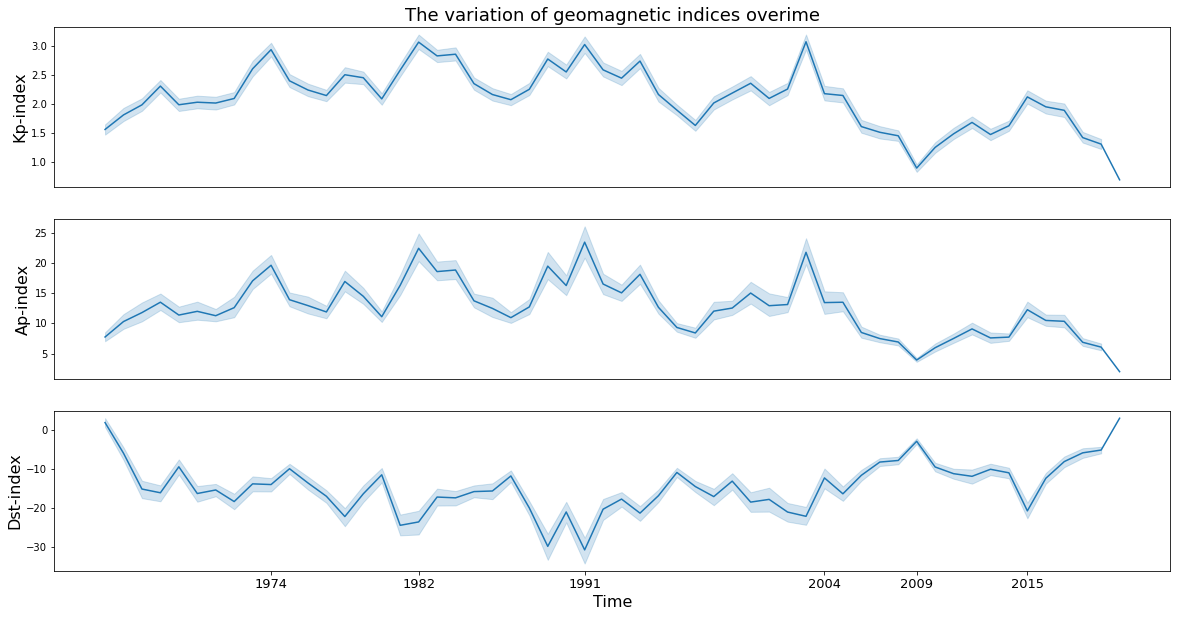

### The effect of the Solar wave speed (km/sec) on Kp-index
As we see strong storms have high solar wave speeds, at kp-index more than 7 the speeds become significantly high

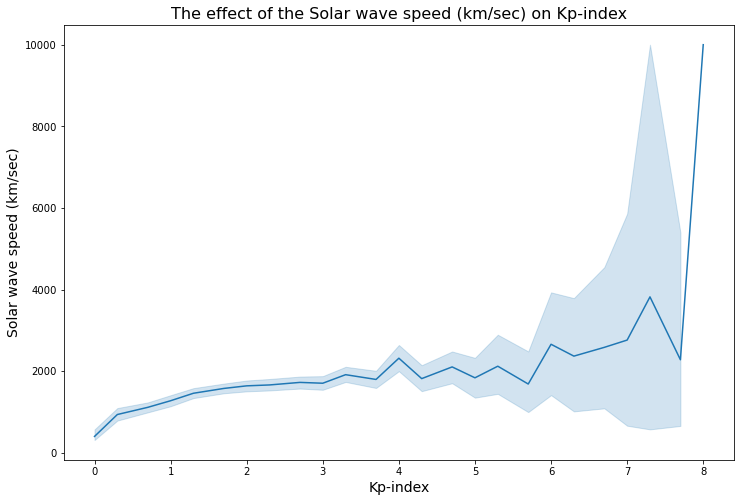

In [49]:
# A lineplot between Kp-index and sw plasma speed
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_clean, x='kp', y='sw_plasma_speed')
plt.title('The effect of the Solar wave speed (km/sec) on Kp-index', fontsize=16)
plt.xlabel('Kp-index', fontsize=14)
plt.ylabel('Solar wave speed (km/sec)', fontsize=14);

### The effect of the Solar wave speed (km/sec) on Dst-index
Here we can clearly see that the storms with high speed weakends the geomagnetic feild more than low speed storms and the significantly effect appears after the storm speed become higher than 600 Km/sec

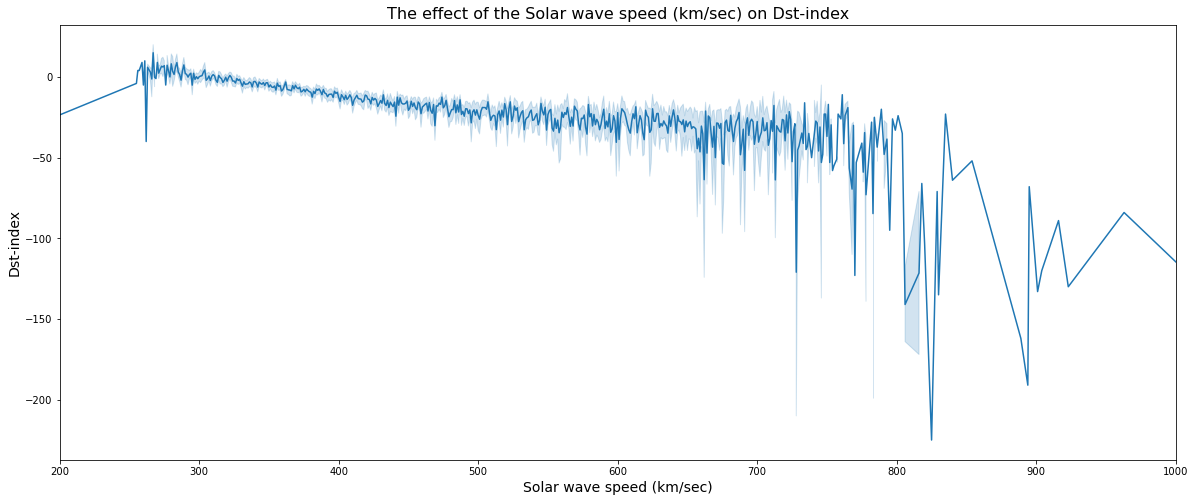

In [50]:
# A lineplot between Dst-index and sw plasma speed
plt.figure(figsize=(20, 8))
sns.lineplot(y= 'Dst', x ='sw_plasma_speed', data=df_clean)
plt.xlim(200, 1000)
plt.title('The effect of the Solar wave speed (km/sec) on Dst-index', fontsize=16)
plt.ylabel('Dst-index', fontsize=14)
plt.xlabel('Solar wave speed (km/sec)', fontsize=14);

### The effect of the Proton flux (> 10 Mev) on Kp-index
It seems that the proton flux doesnt have a real effect on the geomagnetic field because its effect is the same in quiet and strong storms

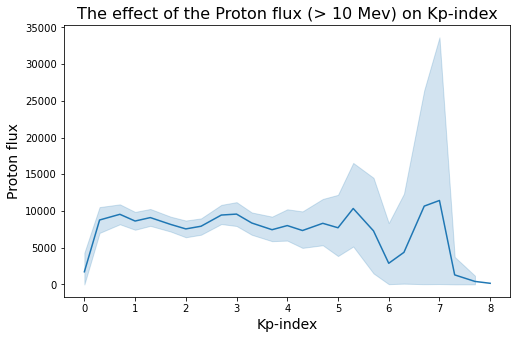

In [51]:
# A lineplot between Kp-index and proton_flux
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_clean, x='kp', y='proton_flux')
plt.title('The effect of the Proton flux (> 10 Mev) on Kp-index', fontsize=16)
plt.xlabel('Kp-index', fontsize=14)
plt.ylabel('Proton flux', fontsize=14);

In [54]:
!jupyter nbconvert solar_activity_Data_Explanation.ipynb --to slides --no-input

This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)

[NbConvertApp] WARNING | pattern 'solar_activity_Data_Explanation.ipynb' matched no files



    Equivalent to: [--Application.log_level=10]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePreprocessor.enabled=True]
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
    Equivalent to: [--ExecutePreprocessor.allow_errors=True]
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
    Equivalent to: [--NbConvertApp.from_stdin=True]
--stdout
    Write notebook output to stdout instead of files.
    Equivalent to: [--NbConvertApp.writer_class=StdoutWriter]
--inplace
    Run nbconvert i